# Data Cleaning

In [28]:
import pandas as pd
import re
import matplotlib.pyplot

In [29]:
data=pd.read_csv(r"C:\Users\rhyth\Downloads\archive (1)\surat_uncleaned.csv")

In [30]:
data.head(5)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac


In [31]:
# Function to convert price format
def convert_price_to_float(price_str):
    pattern = r'₹([\d,]+(?:\.\d+)?)\s*(Lac|Cr)?'  # Matches ₹45.4 Lac or ₹45.4 Cr
    match = re.match(pattern, price_str)
    if match:
        value = float(match.group(1).replace(',', ''))  # Remove commas and convert to float
        multiplier = match.group(2)    # Lac or Cr
        
        if multiplier == 'Lac':
            value *= 100000  # 1 Lac = 100,000
        elif multiplier == 'Cr':
            value *= 10000000  # 1 Cr = 10,000,000
        
        return value
    else:
        return None  # Return None if the price format doesn't match

# Apply conversion function to 'price' column
data['price'] = data['price'].apply(lambda x: convert_price_to_float(x) if isinstance(x, str) else x)

# Function to convert price per square feet format
def convert_price_per_sqft_to_float(price_per_sqft_str):
    pattern = r'₹([\d,]+(?:\.\d+)?)\s*per sqft'  # Matches ₹2,891 per sqft
    match = re.match(pattern, price_per_sqft_str)
    if match:
        value = float(match.group(1).replace(',', ''))  # Remove commas and convert to float
        return value
    else:
        return None  # Return None if the price format doesn't match

# Apply conversion function to 'price_per_sqft' column
data['price_per_sqft'] = data['price_per_sqft'].apply(lambda x: convert_price_per_sqft_to_float(x) if isinstance(x, str) else x)

# Display the updated DataFrame
print(data)

                                          property_name areaWithType  \
0             2 BHK Apartment for Sale in Dindoli Surat  Carpet Area   
1              2 BHK Apartment for Sale in Althan Surat   Super Area   
2             2 BHK Apartment for Sale in Pal Gam Surat   Super Area   
3        2 BHK Apartment for Sale in Jahangirabad Surat  Carpet Area   
4     2 BHK Apartment for Sale in Orchid Fantasia, P...   Super Area   
...                                                 ...          ...   
4520  6 BHK Apartment for Sale in Millionaires Lifes...  Carpet Area   
4521  4 BHK Apartment for Sale in Savan Superia, Alt...   Super Area   
4522  5 BHK Apartment for Sale in Roongta Green Vall...  Carpet Area   
4523  6 BHK Apartment for Sale in Cellestial Dreams,...  Carpet Area   
4524  4 BHK Apartment for Sale in Roongta Green Vall...   Super Area   

     square_feet      transaction            status        floor  \
0       644 sqft     New Property  Poss. by Oct '24  5 out of 10   

In [32]:
data.head(5)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...",2891.0,3380000.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,3551.0,4540000.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,3800.0,4460000.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,3966.0,4700000.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...",3600.0,4500000.0


## Remove unwanted columnsRemove unwanted columns

In [33]:
data.head(5)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...",2891.0,3380000.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,3551.0,4540000.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,3800.0,4460000.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,3966.0,4700000.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...",3600.0,4500000.0


In [34]:
data.drop("description", axis=1, inplace=True)

In [35]:
data.head(5)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,2891.0,3380000.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,3551.0,4540000.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,3800.0,4460000.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,3966.0,4700000.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,3600.0,4500000.0


# Search and Remove duplicates

In [36]:
# Detect duplicates based on all columns (you can specify subset if needed)
duplicate_rows = data[data.duplicated()]

In [38]:
# Print duplicate rows for inspection 
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
                                          property_name areaWithType  \
1187        1 BHK Apartment for Sale in Pandesara Surat   Super Area   
1433  2 BHK Apartment for Sale in Nakshatra Nebula, ...   Super Area   
1511   2 BHK Apartment for Sale in NavYug College Surat  Carpet Area   
1512           2 BHK Apartment for Sale in Adajan Surat   Super Area   
1535         2 BHK Apartment for Sale in Palanpur Surat   Super Area   
...                                                 ...          ...   
3911  4 BHK Apartment for Sale in Empire Regency, Ve...  Carpet Area   
4152             3 BHK Apartment for Sale in Vesu Surat   Super Area   
4273  3 BHK Apartment for Sale in Sky Superia, VIP R...   Super Area   
4361  4 BHK  House for Sale in Someshwara Enclave, V...  Carpet Area   
4495  6 BHK Apartment for Sale in Avadh Classima, Ru...   Super Area   

     square_feet   transaction            status         floor   furnishing  \
1187    650 sqft           NaN     Ready

In [39]:
# Remove duplicates and overwrite the DataFrame
data_cleaned = data.drop_duplicates()

In [40]:
data.info(),data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4525 non-null   object 
 1   areaWithType    4525 non-null   object 
 2   square_feet     4525 non-null   object 
 3   transaction     4421 non-null   object 
 4   status          4524 non-null   object 
 5   floor           4480 non-null   object 
 6   furnishing      4185 non-null   object 
 7   facing          3936 non-null   object 
 8   price_per_sqft  4157 non-null   float64
 9   price           4352 non-null   float64
dtypes: float64(2), object(8)
memory usage: 353.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4399 entries, 0 to 4524
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4399 non-null   object 
 1   areaWithType    4399 non-null   object 
 2   square_feet 

(None, None)

# Search and deal with missing values

In [42]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4399 entries, 0 to 4524
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4399 non-null   object 
 1   areaWithType    4399 non-null   object 
 2   square_feet     4399 non-null   object 
 3   transaction     4298 non-null   object 
 4   status          4398 non-null   object 
 5   floor           4354 non-null   object 
 6   furnishing      4072 non-null   object 
 7   facing          3840 non-null   object 
 8   price_per_sqft  4042 non-null   float64
 9   price           4227 non-null   float64
dtypes: float64(2), object(8)
memory usage: 378.0+ KB


In [41]:
# Check for missing values
missing_values = data_cleaned.isnull()

In [43]:
# Count null values in each column
null_counts = data_cleaned.isnull().sum()

# Display the results
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
property_name       0
areaWithType        0
square_feet         0
transaction       101
status              1
floor              45
furnishing        327
facing            559
price_per_sqft    357
price             172
dtype: int64


In [44]:
data_cleaned['transaction'].fillna(data_cleaned['transaction'].mode()[0], inplace=True)
data_cleaned.dropna(subset=['status'], inplace=True)
data_cleaned.dropna(subset=['floor'], inplace=True)
data_cleaned['furnishing'].fillna(data_cleaned['furnishing'].mode()[0], inplace=True)
data_cleaned['facing'].fillna(data_cleaned['facing'].mode()[0], inplace=True)
data_cleaned['price_per_sqft'].fillna(data_cleaned['price_per_sqft'].median(), inplace=True)
data_cleaned.dropna(subset=['price'], inplace=True)

C:\Users\rhyth\AppData\Local\Temp\ipykernel_25396\2998184498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['transaction'].fillna(data_cleaned['transaction'].mode()[0], inplace=True)
C:\Users\rhyth\AppData\Local\Temp\ipykernel_25396\2998184498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['transaction'].fil

In [45]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 0 to 4517
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4183 non-null   object 
 1   areaWithType    4183 non-null   object 
 2   square_feet     4183 non-null   object 
 3   transaction     4183 non-null   object 
 4   status          4183 non-null   object 
 5   floor           4183 non-null   object 
 6   furnishing      4183 non-null   object 
 7   facing          4183 non-null   object 
 8   price_per_sqft  4183 non-null   float64
 9   price           4183 non-null   float64
dtypes: float64(2), object(8)
memory usage: 359.5+ KB


## Filter the Outliers

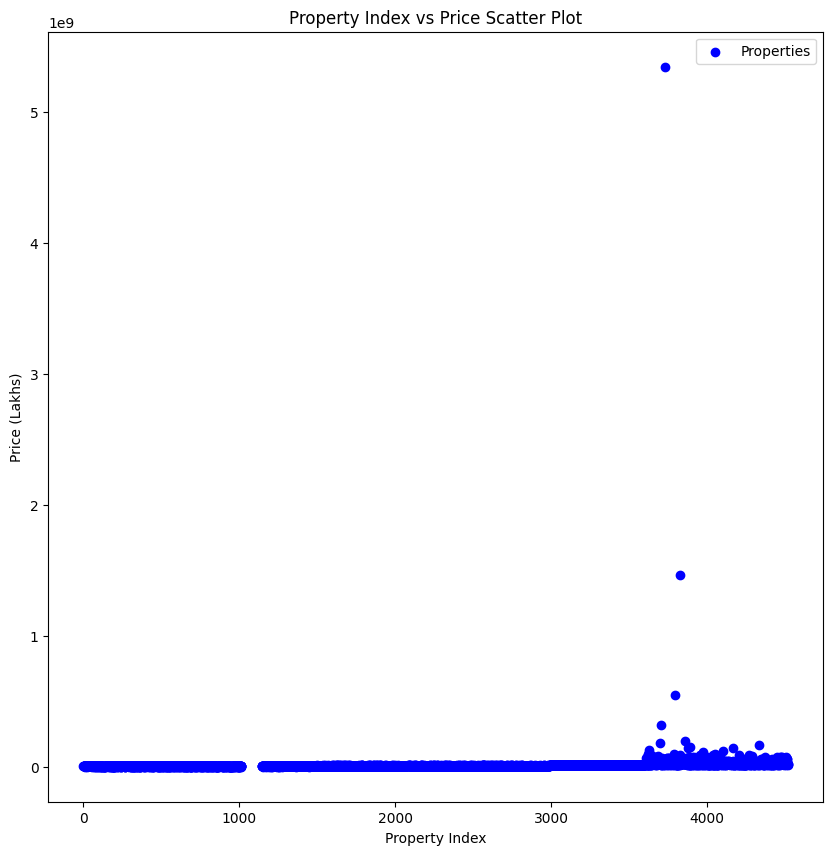

In [49]:
# Plotting
plt.figure(figsize=(10, 10))  # Adjust figure size as needed

# Scatter plot with index as x-axis
plt.scatter(data_cleaned.index, data_cleaned['price'], color='blue', marker='o', label='Properties')

# Adding labels and title
plt.xlabel('Property Index')
plt.ylabel('Price (Lakhs)')
plt.title('Property Index vs Price Scatter Plot')

# Adding legend
plt.legend()

# Display the plot
plt.show()


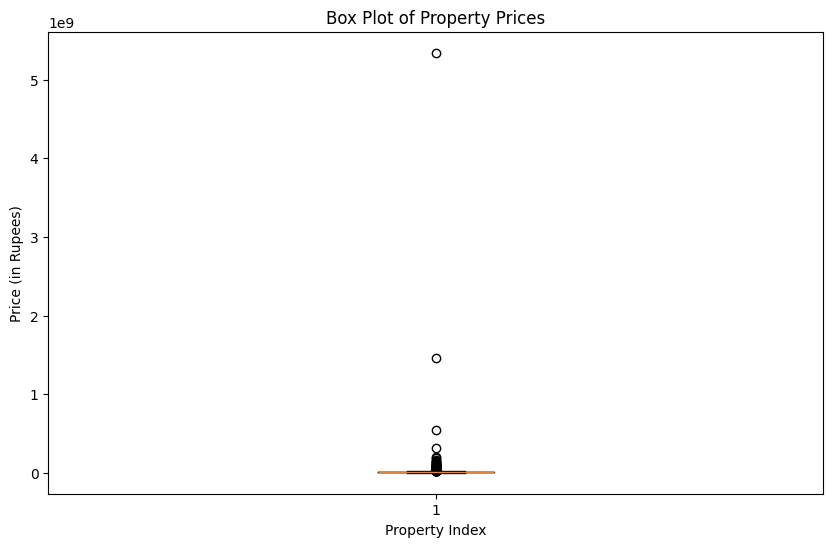

In [50]:
# Box plot to visualize outliers in 'price' column
plt.figure(figsize=(10, 6))
plt.boxplot(data_cleaned['price'])
plt.xlabel('Property Index')
plt.ylabel('Price (in Rupees)')
plt.title('Box Plot of Property Prices')
plt.show()

In [51]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detecting outliers in the 'price' column
outliers = detect_outliers_iqr(data_cleaned['price'])
print("Outliers in the 'price' column:")
print(outliers)

Outliers in the 'price' column:
3602    28400000.0
3607    70000000.0
3608    28000000.0
3609    34500000.0
3615    75000000.0
           ...    
4507    46700000.0
4509    35000000.0
4511    56000000.0
4512    60800000.0
4513    32000000.0
Name: price, Length: 353, dtype: float64


In [52]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Removing outliers from the 'price' column
data_cleaned_no_outliers = data_cleaned.copy()
data_cleaned_no_outliers['price'] = remove_outliers_iqr(data_cleaned['price'])
data_cleaned_no_outliers.dropna(subset=['price'], inplace=True)  # Drop rows with NaN values in 'price'


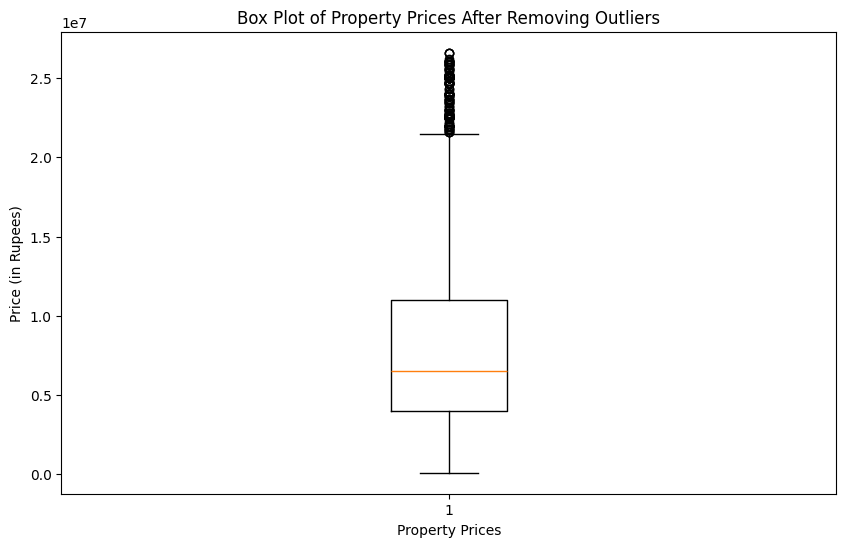

In [53]:
# Box plot to visualize data after removing outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data_cleaned_no_outliers['price'])
plt.xlabel('Property Prices')
plt.ylabel('Price (in Rupees)')
plt.title('Box Plot of Property Prices After Removing Outliers')
plt.show()